<a href="https://colab.research.google.com/github/MonoaraAkter/ML-Lab/blob/main/tip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set seaborn style for better visuals
sns.set(style="whitegrid")

In [3]:
file_path = 'tip.csv'
df = pd.read_csv(file_path)

In [4]:
# Display basic information about the dataset
print("Dataset Info:")
df.info()
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB

First 5 rows:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [ ]:
# Check for missing values and drop if any (though this dataset appears clean)
df = df.dropna()

In [ ]:
# Calculate average tip by day
avg_tip_by_day = df.groupby('day')['tip'].mean().reset_index().sort_values('tip', ascending=False)

In [ ]:
# Calculate total bill and tip by sex
avg_bill_tip_by_sex = df.groupby('sex')[['total_bill', 'tip']].mean().reset_index()

In [ ]:
# Calculate tip percentage (tip as a percentage of total_bill)
df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100

In [ ]:
# Average tip percentage by smoker status
avg_tip_percentage_by_smoker = df.groupby('smoker')['tip_percentage'].mean().reset_index()

In [ ]:
# Print summaries
print("\nAverage Tip by Day:")
print(avg_tip_by_day)
print("\nAverage Bill and Tip by Sex:")
print(avg_bill_tip_by_sex)
print("\nAverage Tip Percentage by Smoker:")
print(avg_tip_percentage_by_smoker)


Average Tip by Day:
    day       tip
2   Sun  3.255132
1   Sat  2.993103
3  Thur  2.771452
0   Fri  2.734737

Average Bill and Tip by Sex:
      sex  total_bill       tip
0  Female   18.056897  2.833448
1    Male   20.744076  3.089618

Average Tip Percentage by Smoker:
  smoker  tip_percentage
0     No       15.932846
1    Yes       16.319604


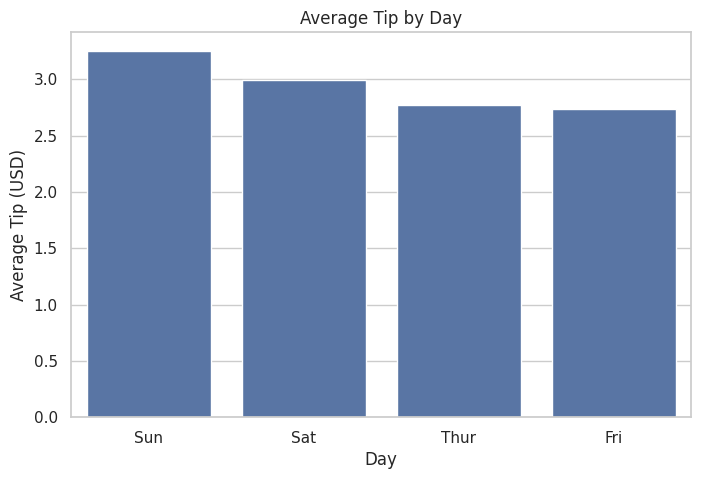

In [ ]:
# Plot 1: Bar plot of Average Tip by Day
plt.figure(figsize=(8, 5))
sns.barplot(x='day', y='tip', data=avg_tip_by_day)
plt.title('Average Tip by Day')
plt.xlabel('Day')
plt.ylabel('Average Tip (USD)')
plt.show()

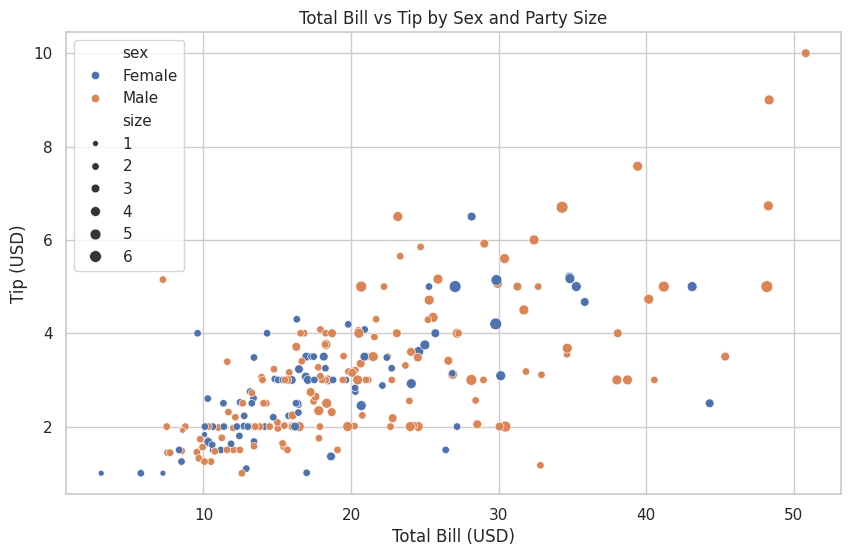

In [ ]:
# Plot 2: Scatter plot of Total Bill vs Tip
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', hue='sex', size='size', data=df)
plt.title('Total Bill vs Tip by Sex and Party Size')
plt.xlabel('Total Bill (USD)')
plt.ylabel('Tip (USD)')
plt.show()

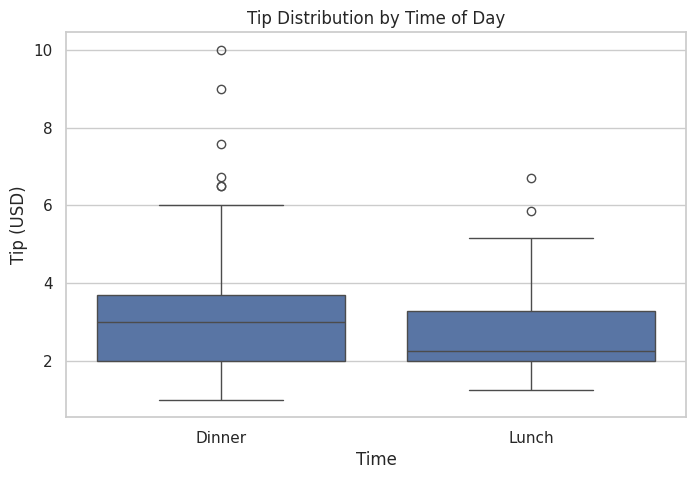

In [ ]:
# Plot 3: Box plot of Tip by Time
plt.figure(figsize=(8, 5))
sns.boxplot(x='time', y='tip', data=df)
plt.title('Tip Distribution by Time of Day')
plt.xlabel('Time')
plt.ylabel('Tip (USD)')
plt.show()

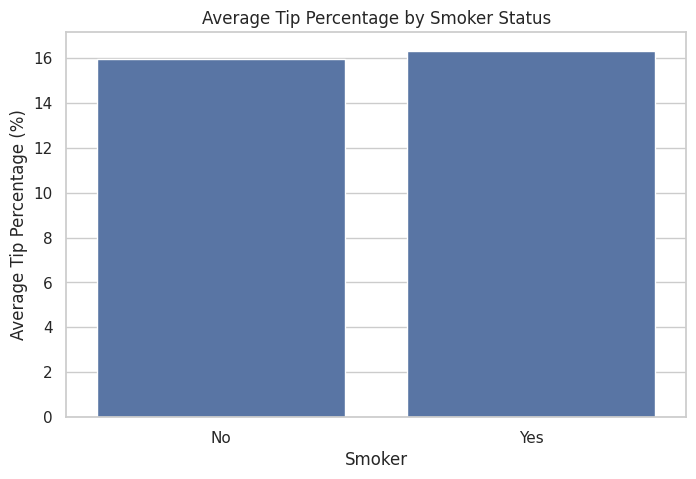

In [ ]:
# Plot 4: Bar plot of Average Tip Percentage by Smoker
plt.figure(figsize=(8, 5))
sns.barplot(x='smoker', y='tip_percentage', data=avg_tip_percentage_by_smoker)
plt.title('Average Tip Percentage by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Average Tip Percentage (%)')
plt.show()

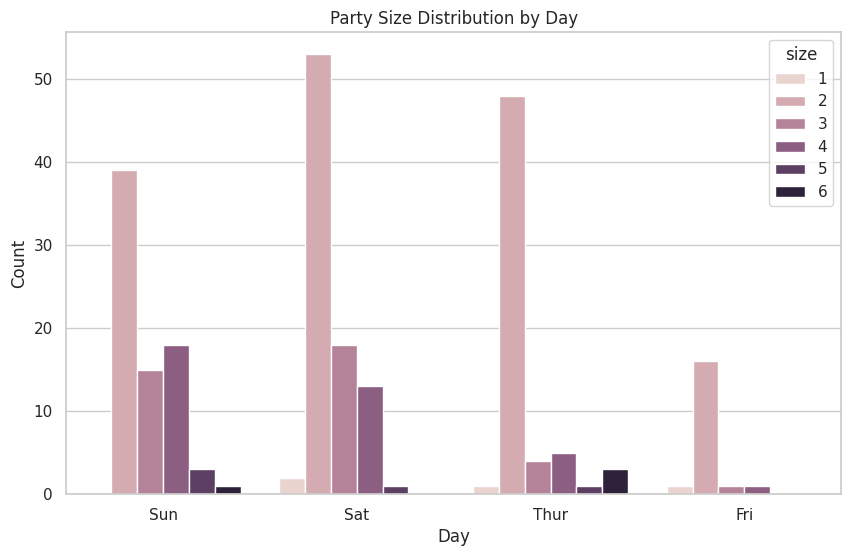

In [ ]:
# Plot 5: Count plot of Party Size by Day
plt.figure(figsize=(10, 6))
sns.countplot(x='day', hue='size', data=df)
plt.title('Party Size Distribution by Day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

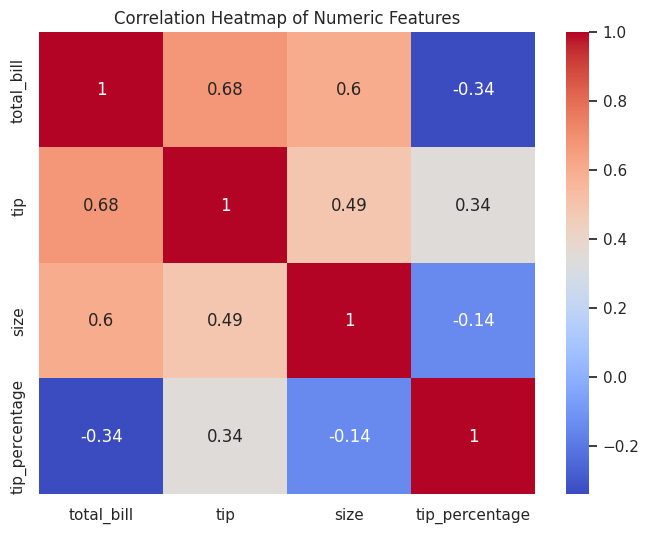

In [ ]:
# Plot 6: Correlation heatmap of numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()